In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm, tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.mixture import GaussianMixture

import random
from datetime import datetime

###############################################################################################################################

Data

###############################################################################################################################

In [2]:
Y_is = pd.read_excel('Y_is.xlsx').set_index('Reaction')
Y_oos = pd.read_excel('Y_oos.xlsx').set_index('Reaction')

In [3]:
Y_is

,ΔΔG‡
Reaction,
Addition of Alcohols Scope 1,2.058288
Addition of Alcohols Scope 2,1.743479
Addition of Alcohols Scope 3,1.629256
Addition of Alcohols Scope 4,1.881808
Addition of Alcohols Scope 5,1.881808
...,...
Strecker Reaction (with ketimines) Imine scope 6,-0.840427
Strecker Reaction (with ketimines) Imine scope 7,-1.017251
Strecker Reaction (with ketimines) Imine scope 8,-0.767712


In [4]:
#iminium + nucleophile
X_total_is_scaled = pd.read_excel('X (all features, IS, scaled).xlsx').set_index('Reaction')
X_total_oos_scaled = pd.read_excel('X (all features, OOS, scaled).xlsx').set_index('Reaction')

In [5]:
#iminium
X_imi_is_scaled = pd.read_excel('X (iminium, IS, scaled).xlsx').set_index('Reaction')
X_imi_oos_scaled = pd.read_excel('X (iminium, OOS, scaled).xlsx').set_index('Reaction')

In [6]:
#nucleophile
X_nuc_is_scaled = pd.read_excel('X (nucleophile, IS, scaled).xlsx').set_index('Reaction')
X_nuc_oos_scaled = pd.read_excel('X (nucleophile, OOS, scaled).xlsx').set_index('Reaction')

###############################################################################################################################

End of Data Processing

###############################################################################################################################

In [7]:
#random_state = random.seed(datetime.now())
random_state = random.seed(datetime.now())
test_size = 0.5
#X = X_iminium

In [8]:
catalyst_columns = ['arhs', 'alhs', 'aavg', 'b', 'AREA(q)', 'sin(AREA)',
 'Lwhole R', 'B1whole R', 'B5whole R', 'L2 R', 'B12 R', 'B52 R',
 'L3 R', 'B13 R', 'B53 R', 'L4 R', 'B14 R', 'B54 R',
 'L5 R', 'B15 R', 'B55 R', 'L6 R', 'B16 R', 'B56 R',
 'C1 R', 'C2 R', 'C3 R', 'C4 R', 'C5 R', 'C6 R',
 'Lwhole L', 'B1whole L', 'B5whole L', 'L2 L', 'B12 L', 'B52 L',
 'L3 L', 'B13 L', 'B53 L', 'L4 L', 'B14 L', 'B54 L',
 'L5 L', 'B15 L', 'B55 L', 'L6 L', 'B16 L', 'B56 L',
 'C1 L', 'C2 L', 'C3 L', 'C4 L', 'C5 L', 'C6 L',
 'Lwhole A', 'B1whole A', 'B5whole A', 'L2 A', 'B12 A', 'B52 A', 
 'L3 A', 'B13 A', 'B53 A', 'L4 A', 'B14 A', 'B54 A',
 'L5 A', 'B15 A', 'B55 A', 'L6 A', 'B16 A', 'B56 A',
 'C1 A', 'C2 A', 'C3 A', 'C4 A', 'C5 A', 'C6 A',
 'nPOsy', 'iPOsy', 'nPOas', 'iPOas', 'P', 'PNMR']

In [9]:
nucleophile_columns = ['H (nucleophile)', 'X', 'Nu', 'nXH', 'iXH', 'HOMO (nucleophile)',
 'LUMO (nucleophile)', 'Polarizability (nucleophile)', 'L', 'B1', 'B5', 'bond distance H-X',
 'H-X-Nu', 'H-X-CNu']

In [10]:
solvent_columns = ['First Zagreb', 'First Zagreb index by valence vertex degrees', 'Second Zagreb', 'Second Zagreb index by valence vertex degrees', 'Polarity',
 'Narumi Simple Topological', 'Narumi Harmonic Topological', 'Narumi Geometric Topological', 'Total structure connectivity',
 'Wiener', 'Mean Wiener', 'Xu', 'Quadratic', 'Radial centric', 'Mean Square Distance Balaban', 'Superpendentic',
 'Harary', 'Log of product of row sums', 'Pogliani', 'Schultz Molecular Topological', 'Schultz Molecular Topological by valence vertex degrees',
 'Mean Distance Degree Deviation', 'Ramification', 'Gutman Molecular Topological', 'Gutman MTI by valence vertex degrees',
 'Average vertex distance degree', 'Unipolarity', 'Centralization', 'Variation', 'Molecular electrotopological variation',
 'Maximal electrotopological positive variation', 'Maximal electrotopological negative variation',
 'Eccentric connectivity', 'Eccentricity', 'Average eccentricity', 'Eccentric',
 'Valence connectivity index chi-0', 'Valence connectivity index chi-1', 'Valence connectivity index chi-2', 'Valence connectivity index chi-3',
 'Valence connectivity index chi-4', 'Valence connectivity index chi-5', 'Average valence connectivity index chi-0', 'Average valence connectivity index chi-1',
 'Average valence connectivity index chi-2', 'Average valence connectivity index chi-3', 'Average valence connectivity index chi-4',
 'Average valence connectivity index chi-5', 'Quasi Wiener', 'First Mohar', 'Second Mohar', 'Spanning tree number',
 'Kier benzene-likeliness index', 'Topological charge index of order 1', 'Topological charge index of order 2', 'Topological charge index of order 3',
 'Topological charge index of order 4', 'Mean topological charge index of order 1', 'Mean topological charge index of order 2',
 'Mean topological charge index of order 3', 'Mean topological charge index of order 4', 'Global topological charge',
 'Hyper-distance-path index', 'Reciprocal hyper-distance-path index', 'Square reciprocal distance sum', 'Modified Randic connectivity',
 'Balaban centric', 'Lopping centric', 'Kier Hall electronegativity', 'Sum of topological distances between O..O', 'Sum of topological distances between Cl..Cl',
 'Wiener-type index from Z weighted distance matrix - Barysz matrix', 'Wiener-type index from electronegativity weighted distance matrix',
 'Wiener-type index from mass weighted distance matrix', 'Wiener-type index from van der waals weighted distance matrix',
 'Wiener-type index from polarizability weighted distance matrix', 'Balaban-type index from Z weighted distance matrix - Barysz matrix',
 'Balaban-type index from electronegativity weighted distance matrix', 'Balaban-type index from mass weighted distance matrix',
 'Balaban-type index from van der waals weighted distance matrix', 'Balaban-type index from polarizability weighted distance matrix',
 'Topological diameter', 'Topological radius', 'Petitjean 2D shape', 'Balaban distance connectivity index', 'Solvation connectivity index chi-0',
 'Solvation connectivity index chi-1', 'Solvation connectivity index chi-2', 'Solvation connectivity index chi-3',
 'Solvation connectivity index chi-4', 'Solvation connectivity index chi-5', 'Connectivity index chi-0', 'Connectivity chi-1 [Randic connectivity]',
 'Connectivity index chi-2', 'Connectivity index chi-3', 'Connectivity index chi-4', 'Connectivity index chi-5', 'Average connectivity index chi-0',
 'Average connectivity index chi-1', 'Average connectivity index chi-2', 'Average connectivity index chi-3', 'Average connectivity index chi-4',
 'Average connectivity index chi-5', 'reciprocal distance Randic-type index', 'reciprocal distance square Randic-type index', '1-path Kier alpha-modified shape index',
 '2-path Kier alpha-modified shape index', '3-path Kier alpha-modified shape index', 'Kier flexibility',
 'path/walk 2 - Randic shape index', 'path/walk 3 - Randic shape index', 'path/walk 4 - Randic shape index', 'path/walk 5 - Randic shape index',
 'E-state topological parameter', 'Ring Count 5', 'Ring Count 6', 'Atom Count', 'Bond Count', 'Atoms in Ring System',
 'Bonds in Ring System', 'Cyclomatic number', 'Number of ring systems', 'Normalized number of ring systems', 'Ring Fusion degree',
 'Total ring size', 'Ring perimeter', 'Molecule cyclized degree', 'Molecule cyclized degree.1', 'Ring complexity index',
 'Van der Waals surface area', 'MR8', 'ALOGP1', 'ALOGP2', 'ALOGP3', 'ALOGP4', 'ALOGP5', 'ALOGP8', 'ALOGP10', 'PEOE1',
 'PEOE2', 'PEOE4', 'PEOE5', 'PEOE6', 'PEOE7', 'PEOE8', 'PEOE9', 'PEOE11', 'PEOE13', 'LOGP', 'CLOGP', 'MR',
 'CMR', 'RMM', 'Density', 'no. of H bond donor', 'no. H bond acceptor', 'Polarizability (solvent)',
 'HOMO (solvent)', 'LUMO (solvent)']

In [11]:
iminium_columns = ['nNH', 'i NH', 'N', 'H (iminium)', 'C', 'SubL',
 'SubS', 'PG', 'PGL', 'PGB1', 'PGB5', 'SL',
 'SB1', 'SB5', 'LL', 'LB1', 'LB5', 'HOMO (iminium)',
 'LUMO (iminium)', 'Polarizability (iminium)', 'electronic energy difference (kcal/mol)']

In [89]:
len(iminium_columns)
#len(catalyst_columns)
#len(solvent_columns)
#len(nucleophile_columns)

21

In [12]:
#results = pd.DataFrame(columns = ['n_components', 'aic', 'bic'])
#results.set_index('n_components', inplace = True)

#for i in range(2, 30):
 #   gmm = GaussianMixture(n_components = i).fit(X_total_is_scaled.loc[:, features])
  #  results.loc[i, 'aic'] = gmm.aic(X_total_is_scaled.loc[:, features])
   # results.loc[i, 'bic'] = gmm.bic(X_total_is_scaled.loc[:, features])

In [13]:
#results

In [14]:
#plt.plot(results.index, results['aic'])
#plt.plot(results.index, results['bic'])
#plt.xlabel('n_components')
#plt.ylabel('AIC/BIC score')

In [15]:
#gmm = GaussianMixture(n_components = 15).fit(X_total_is_scaled.loc[:, features])
#scores = gmm.score(X_total_is_scaled.loc[:, features])
#scores_oos_18 = gmm.score(X_total_oos_scaled.loc[:, features].iloc[0:15, :])
#scores_oos_19 = gmm.score(X_total_oos_scaled.loc[:, features].iloc[15:30, :])
#scores_oos_20 = gmm.score(X_total_oos_scaled.loc[:, features].iloc[30:, :])

#print(scores_oos_18)
#print(scores_oos_19)
#print(scores_oos_20)
#print(scores)

#for i in range(0, 64):
#    score = gmm.score(np.array(X_total_oos_scaled.loc[:, features].iloc[i, :]).reshape(1, -1))
#    print(list(X_total_oos_scaled.index)[i], score)

###############################################################################################################################

Pipeline Development

###############################################################################################################################

In [12]:
features_imi = ['C', 'SL', 'PG']
gmm_imi = GaussianMixture(n_components = 15).fit(X_total_is_scaled.loc[:, features_imi])

scores = gmm_imi.score(X_total_is_scaled.loc[:, features_imi])

scores_oos_18 = gmm_imi.score(X_total_oos_scaled.loc[:, features_imi].iloc[0:15, :])
scores_oos_19 = gmm_imi.score(X_total_oos_scaled.loc[:, features_imi].iloc[15:30, :])
scores_oos_20 = gmm_imi.score(X_total_oos_scaled.loc[:, features_imi].iloc[30:, :])

print(scores_oos_18)
print(scores_oos_19)
print(scores_oos_20)
print(scores)

8.429629132659262
-931.348899643825
8.895844011498346
8.030268652841071


In [17]:
X_total_is_scaled.loc[:, 'C'][labels == 0]

NameError: name 'labels' is not defined

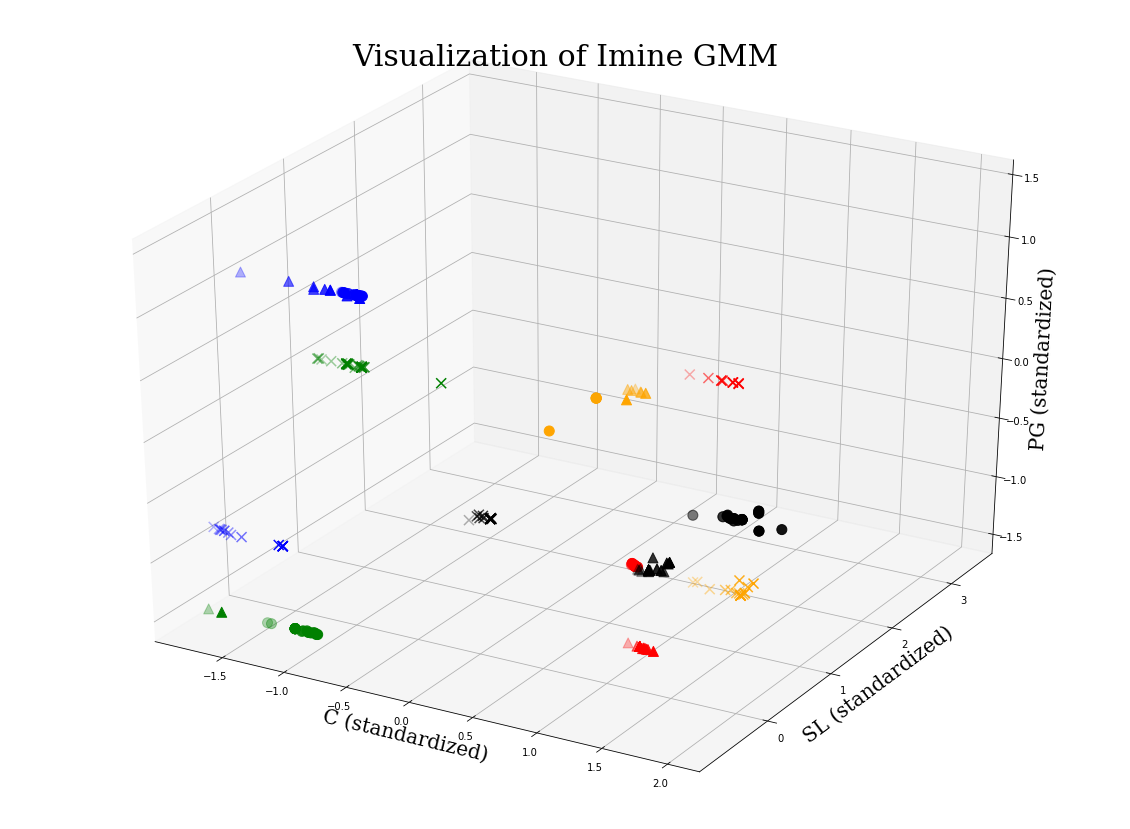

In [13]:
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(projection='3d')

font1 = {'family':'serif','color':'black','size':30}
font2 = {'family':'serif','color':'black','size':20}

labels = gmm_imi.predict(X_total_is_scaled.loc[:, features_imi])
size = 100
#ax.scatter(X_total_is_scaled.loc[:, 'C'], X_total_is_scaled.loc[:, 'SL'], X_total_is_scaled.loc[:, 'PG'], c=labels, s=100)#, cmap='viridis')

ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 0], X_total_is_scaled.loc[:, 'SL'][labels == 0], X_total_is_scaled.loc[:, 'PG'][labels == 0], c='r', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 1], X_total_is_scaled.loc[:, 'SL'][labels == 1], X_total_is_scaled.loc[:, 'PG'][labels == 1], c='b', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 2], X_total_is_scaled.loc[:, 'SL'][labels == 2], X_total_is_scaled.loc[:, 'PG'][labels == 2], c='g', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 3], X_total_is_scaled.loc[:, 'SL'][labels == 3], X_total_is_scaled.loc[:, 'PG'][labels == 3], c='black', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 4], X_total_is_scaled.loc[:, 'SL'][labels == 4], X_total_is_scaled.loc[:, 'PG'][labels == 4], c='orange', s=size)

ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 5], X_total_is_scaled.loc[:, 'SL'][labels == 5], X_total_is_scaled.loc[:, 'PG'][labels == 5], c='r', marker = 'x', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 6], X_total_is_scaled.loc[:, 'SL'][labels == 6], X_total_is_scaled.loc[:, 'PG'][labels == 6], c='black', marker = 'x', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 7], X_total_is_scaled.loc[:, 'SL'][labels == 7], X_total_is_scaled.loc[:, 'PG'][labels == 7], c='g', marker = 'x', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 8], X_total_is_scaled.loc[:, 'SL'][labels == 8], X_total_is_scaled.loc[:, 'PG'][labels == 8], c='b', marker = 'x', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 9], X_total_is_scaled.loc[:, 'SL'][labels == 9], X_total_is_scaled.loc[:, 'PG'][labels == 9], c='orange', marker = 'x', s=size)

ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 10], X_total_is_scaled.loc[:, 'SL'][labels == 10], X_total_is_scaled.loc[:, 'PG'][labels == 10], c='r', marker = '^', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 11], X_total_is_scaled.loc[:, 'SL'][labels == 11], X_total_is_scaled.loc[:, 'PG'][labels == 11], c='b', marker = '^', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 12], X_total_is_scaled.loc[:, 'SL'][labels == 12], X_total_is_scaled.loc[:, 'PG'][labels == 12], c='g', marker = '^', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 13], X_total_is_scaled.loc[:, 'SL'][labels == 13], X_total_is_scaled.loc[:, 'PG'][labels == 13], c='black', marker = '^', s=size)
ax.scatter(X_total_is_scaled.loc[:, 'C'][labels == 14], X_total_is_scaled.loc[:, 'SL'][labels == 14], X_total_is_scaled.loc[:, 'PG'][labels == 14], c='orange', marker = '^', s=size)

ax.set_xlabel('C (standardized)', fontdict = font2)
ax.set_ylabel('SL (standardized)', fontdict = font2)
ax.set_zlabel('PG (standardized)', fontdict = font2)
ax.set_title('Visualization of Imine GMM', fontdict = font1)
plt.show()

In [14]:
array = gmm_nuc.score_samples(X_total_oos_scaled.loc[:, features_nuc])
#score = np.sum(array) / 34
#print(score)
array

NameError: name 'gmm_nuc' is not defined

In [15]:
features_nuc = ['H-X-Nu', 'H-X-CNu', 'Nu', 'Polarizability (nucleophile)']
gmm_nuc = GaussianMixture(n_components = 14).fit(X_total_is_scaled.loc[:, features_nuc])

scores = gmm_nuc.score(X_total_is_scaled.loc[:, features_nuc])

scores_oos_18 = gmm_nuc.score(X_total_oos_scaled.loc[:, features_nuc].iloc[0:15, :])
scores_oos_19 = gmm_nuc.score(X_total_oos_scaled.loc[:, features_nuc].iloc[15:30, :])
scores_oos_20 = gmm_nuc.score(X_total_oos_scaled.loc[:, features_nuc].iloc[30:, :])

print(scores_oos_18)
print(scores_oos_19)
print(scores_oos_20)
print(scores)

-646434.2500717504
14.820454381723065
10.600616508820238
17.75630503818476


In [16]:
forest = RandomForestRegressor()

forest.fit(X_total_is_scaled.reset_index().drop(['Reaction'], axis = 1), Y_is.reset_index().drop('Reaction', axis = 1).values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
OOS_pred = forest.predict(X_total_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
#oos_results.head(30)

MSE: 2.505727440478646
Mean Absolute Error 18: 0.4381215603780177
Mean Absolute Error 19: 3.0933017367622084
Mean Absolute Error 20: 0.5221778847340227
r^2: 0.48313463506025756


In [18]:
forest_iminium = RandomForestRegressor()

forest_iminium.fit(X_imi_is_scaled.reset_index().drop(['Reaction'], axis = 1), Y_is.reset_index().drop('Reaction', axis = 1).values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
OOS_pred = forest_iminium.predict(X_imi_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
#oos_results.head(30)

MSE: 2.5343375502223298
Mean Absolute Error 18: 0.6029019148513538
Mean Absolute Error 19: 3.0357856581449227
Mean Absolute Error 20: 0.6256731572718413
r^2: 0.4772331253530363


In [20]:
forest_nucleophile = RandomForestRegressor()

forest_nucleophile.fit(X_nuc_is_scaled.reset_index().drop(['Reaction'], axis = 1), Y_is.reset_index().drop('Reaction', axis = 1).values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
OOS_pred = forest_nucleophile.predict(X_nuc_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
#oos_results.head(30)

MSE: 1.0294703641972462
Mean Absolute Error 18: 1.8140843626966756
Mean Absolute Error 19: 0.24843957967724414
Mean Absolute Error 20: 0.5369673000099361
r^2: 0.787647464409051


In [22]:
lasso = Lasso(alpha = 0.004, tol = 0.00001)

lasso.fit(X_total_is_scaled.reset_index().drop(['Reaction'], axis = 1), Y_is.reset_index().drop('Reaction', axis = 1))

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021946930944849896, tolerance: 0.011550391740217115
  positive)


Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=1e-05, warm_start=False)

In [23]:
OOS_pred = lasso.predict(X_total_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
#oos_results.head(30)

MSE: 0.47325419590529105
Mean Absolute Error 18: 0.25197803523108864
Mean Absolute Error 19: 0.6039106067787906
Mean Absolute Error 20: 0.6813399021961972
r^2: 0.9023801636505496


In [24]:
forest = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_total_is_scaled, Y_is, test_size = test_size, random_state = random_state)

forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results
print('Train r^2 score:' + str(r2_score(train_results['Actual'], train_results['Predicted'])))

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.32020045420371124
r^2: 0.8882723859619724
Train r^2 score:0.9860796497078058
Total r^2 score: 0.9397803755004447


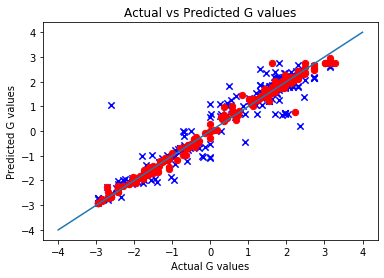

In [25]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [33]:
OOS_pred = forest.predict(X_total_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
#oos_results.head(30)

MSE: 1.4780629471141884
Mean Absolute Error 18: 0.25237018193221605
Mean Absolute Error 19: 2.3102273225576107
Mean Absolute Error 20: 0.5184729093452636
r^2: 0.6951146672129056


In [192]:
forest_iminium = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_imi_is_scaled, Y_is, test_size = test_size, random_state = random_state)

forest_iminium.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest_iminium.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest_iminium.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results
print('Train r^2 score:' + str(r2_score(train_results['Actual'], train_results['Predicted'])))

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.38982548836254416
r^2: 0.8865205996532035
Train r^2 score:0.9583505777936826
Total r^2 score: 0.9175541932796372


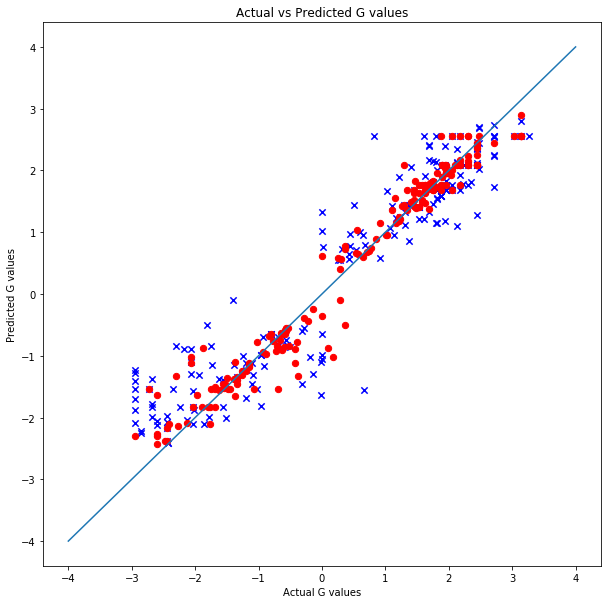

In [193]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [194]:
OOS_pred = forest_iminium.predict(X_imi_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
#oos_results.head(30)

MSE: 2.3976992434102256
Mean Absolute Error 18: 0.39988329769528463
Mean Absolute Error 19: 2.959222433209753
Mean Absolute Error 20: 0.6462038740739069
r^2: 0.5054179978073589


In [195]:
forest_nucleophile = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_nuc_is_scaled, Y_is, test_size = test_size, random_state = random_state)

forest_nucleophile.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest_nucleophile.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest_nucleophile.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results
print('Train r^2 score:' + str(r2_score(train_results['Actual'], train_results['Predicted'])))

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.6455183128848129
r^2: 0.7773223189259242
Train r^2 score:0.9718804947315064
Total r^2 score: 0.8786706076583868


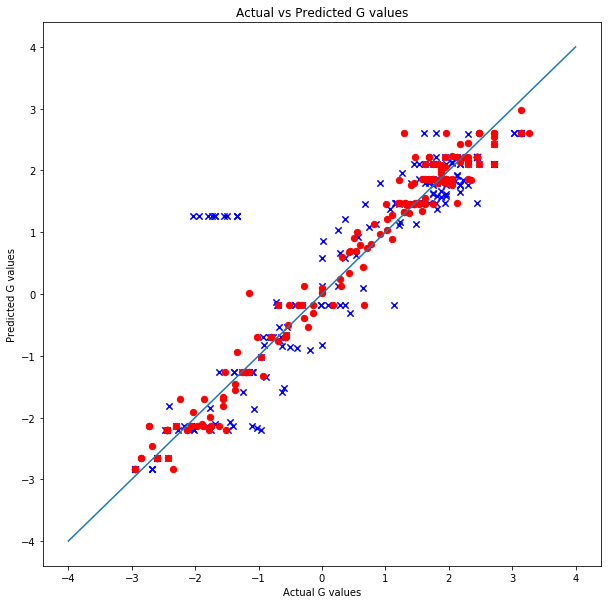

In [196]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [197]:
OOS_pred = forest_nucleophile.predict(X_nuc_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
#oos_results.head(30)

MSE: 0.9329890185679532
Mean Absolute Error 18: 1.770112976852527
Mean Absolute Error 19: 0.23404308802216048
Mean Absolute Error 20: 0.4915984634237193
r^2: 0.8075490167937892


In [198]:
#forest.predict(np.array(X_oos_scaled[5,:]).reshape(1,-1))

In [199]:
lasso = Lasso(alpha = 0.004, tol = 0.00001)
X_train, X_test, Y_train, Y_test = train_test_split(X_total_is_scaled, Y_is, test_size = test_size, random_state = random_state)

lasso.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = lasso.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = lasso.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.4008345780922969
r^2: 0.8646868252541866
Total r^2 score: 0.9071636073182908


C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013615013997842595, tolerance: 0.005891629835992904
  positive)


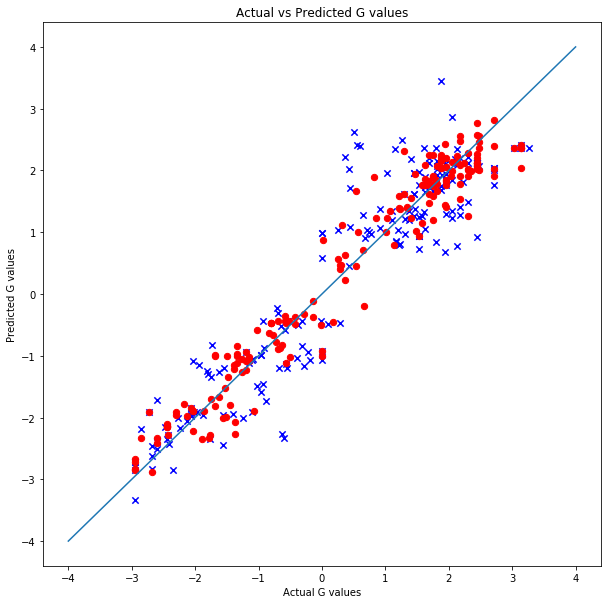

In [200]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [201]:
OOS_pred = lasso.predict(X_total_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
#oos_results.tail(30)

MSE: 0.5158344877251119
Mean Absolute Error 18: 0.27450357815097065
Mean Absolute Error 19: 0.6589737169480738
Mean Absolute Error 20: 0.7334893147107955
r^2: 0.8935969744995027


In [31]:
def predict(X_input):
    Y_pred = pd.DataFrame(columns = ['Reaction', 'type', 'Predicted'])
    Y_pred.set_index('Reaction', inplace = True)
    
    for i in range(len(X_input.index)):
        gmm_imi_score = gmm_imi.score(np.array(X_input.loc[:, features_imi].iloc[i, :]).reshape(1, -1))
        gmm_nuc_score = gmm_nuc.score(np.array(X_input.loc[:, features_nuc].iloc[i, :]).reshape(1, -1))
        
        if gmm_imi_score > 0 and gmm_nuc_score > 0:
            prediction = forest.predict(np.array(X_input.iloc[i,:]).reshape(1,-1))
            Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction[0]
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'forest (all)'
            
        #elif gmm_imi_score > 0 and gmm_nuc_score < 0:
        #    prediction = forest_iminium.predict(np.array(X_input.loc[:, catalyst_columns + solvent_columns + iminium_columns].iloc[i,:]).reshape(1,-1))
        #    Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction[0]
        #    Y_pred.loc[list(X_input.index)[i], 'type'] = 'forest (iminium)'
            
        elif gmm_imi_score < 0 and gmm_nuc_score > 0:
            prediction = forest_nucleophile.predict(np.array(X_input.loc[:, catalyst_columns + nucleophile_columns + solvent_columns].iloc[i,:]).reshape(1,-1))
            Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction[0]
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'forest (nucleophile)'
            
        elif gmm_nuc_score < 0:
            prediction = lasso.predict(np.array(X_input.iloc[i,:]).reshape(1,-1))
            Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction[0]
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'lasso'
            
    return Y_pred

In [43]:
results = predict(X_total_oos_scaled) 

In [44]:
results

,type,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,lasso,1.79171
Addition of enecarbamates to benzoyl imines 2,lasso,1.745
Addition of enecarbamates to benzoyl imines 3,lasso,1.79682
Addition of enecarbamates to benzoyl imines 4,lasso,1.79682
Addition of enecarbamates to benzoyl imines 5,lasso,1.85809
...,...,...
Addition of thiols to imines (Denmark) 30,forest (all),2.5763
Addition of thiols to imines (Denmark) 31,forest (all),2.06439
Addition of thiols to imines (Denmark) 32,forest (all),2.08035


In [27]:
oos_results = pd.concat([Y_oos, results], axis = 1)
#oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'type', 'Predicted']

print('MSE: ' + str(mean_squared_error(oos_results['Actual'], oos_results['Predicted'])))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(oos_results['Actual'][0:15], oos_results['Predicted'][0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(oos_results['Actual'][15:30], oos_results['Predicted'][15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(oos_results['Actual'][30:], oos_results['Predicted'][30:])))
print('r^2: ' + str(r2_score(oos_results['Actual'], oos_results['Predicted'])))
oos_results

MSE: 0.23437528454754736
Mean Absolute Error 18: 0.2519780352310886
Mean Absolute Error 19: 0.2607557633344243
Mean Absolute Error 20: 0.5169298046098215
r^2: 0.9516545714336019


,Actual,type,Predicted
Reaction,,,
Addition of enecarbamates to benzoyl imines 1,2.169290,lasso,1.79171
Addition of enecarbamates to benzoyl imines 2,1.963952,lasso,1.745
Addition of enecarbamates to benzoyl imines 3,1.963952,lasso,1.79682
Addition of enecarbamates to benzoyl imines 4,1.963952,lasso,1.79682
Addition of enecarbamates to benzoyl imines 5,1.881808,lasso,1.85809
...,...,...,...
Addition of thiols to imines (Denmark) 30,3.134303,forest (all),2.53936
Addition of thiols to imines (Denmark) 31,1.446177,forest (all),2.03073
Addition of thiols to imines (Denmark) 32,2.058288,forest (all),2.05724


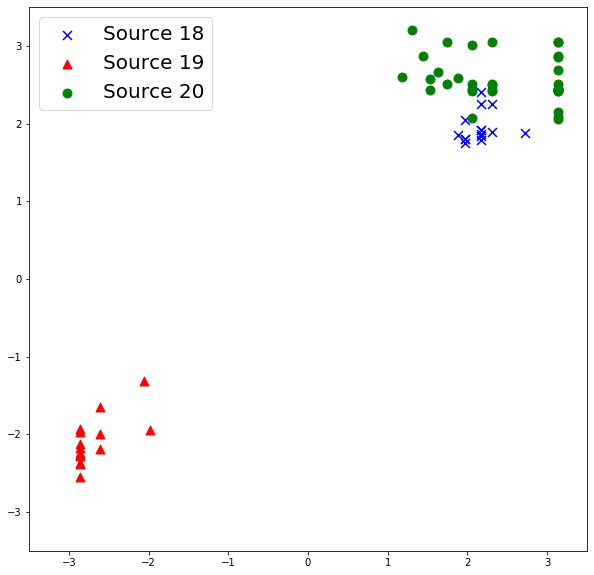

In [49]:
x = np.linspace(-4,4,10)

plt.scatter(oos_results['Actual'][0:15], oos_results['Predicted'][0:15], color = 'b', marker = 'x', s = 80, label = "Source 18")
plt.scatter(oos_results['Actual'][15:30], oos_results['Predicted'][15:30], color = 'r', marker = '^', s = 80, label = "Source 19")
plt.scatter(oos_results['Actual'][30:], oos_results['Predicted'][30:], color = 'g', marker = 'o', s = 80, label = "Source 20")

#plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
#plt.plot(x, x)
#plt.title('Actual vs Predicted G values - Pipeline', fontsize = 30)
#plt.xlabel('Actual G values', fontsize = 20)
#plt.ylabel('Predicted G values', fontsize = 20)
plt.rcParams['figure.figsize'] = [10,10]
plt.legend(prop={'size': 20})
plt.show()

In [19]:
def run_pipeline(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MAE18', 'MAE19', 'MAE20', 'r^2'])
    for i in range(iterations):
        forest = RandomForestRegressor()
        forest.fit(X_total_is_scaled.reset_index().drop(['Reaction'], axis = 1), Y_is.reset_index().drop('Reaction', axis = 1).values.ravel())

        #forest_iminium = RandomForestRegressor()
        #forest_iminium.fit(X_imi_is_scaled.reset_index().drop(['Reaction'], axis = 1), Y_is.reset_index().drop('Reaction', axis = 1).values.ravel())

        forest_nucleophile = RandomForestRegressor()
        forest_nucleophile.fit(X_nuc_is_scaled.reset_index().drop(['Reaction'], axis = 1), Y_is.reset_index().drop('Reaction', axis = 1).values.ravel())

        lasso = Lasso(alpha = 0.004, tol = 0.00001)
        lasso.fit(X_total_is_scaled.reset_index().drop(['Reaction'], axis = 1), Y_is.reset_index().drop('Reaction', axis = 1))

        results = predict(X_total_oos_scaled) 
        
        
        oos_results = pd.concat([Y_oos, results], axis = 1)
        #oos_results.set_index('Reaction', inplace = True)
        oos_results.columns = ['Actual', 'type', 'Predicted']

        scores = scores.append({'iteration': str(i+1),
                    'MAE18': mean_absolute_error(oos_results['Actual'][0:15], oos_results['Predicted'][0:15]),
                    'MAE19': mean_absolute_error(oos_results['Actual'][15:30], oos_results['Predicted'][15:30]),
                    'MAE20': mean_absolute_error(oos_results['Actual'][30:], oos_results['Predicted'][30:]),
                    'r^2': r2_score(oos_results['Actual'], oos_results['Predicted'])}, ignore_index = True)
    return scores

In [30]:
run_pipeline(5)

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021946930944849896, tolerance: 0.011550391740217115
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021946930944849896, tolerance: 0.011550391740217115
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021946930944849896, tolerance: 0.011550391740217115
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

,iteration,MAE18,MAE19,MAE20,r^2
0,1,0.251978,0.24077,0.526193,0.950748
1,2,0.251978,0.24077,0.526193,0.950748
2,3,0.251978,0.24077,0.526193,0.950748
3,4,0.251978,0.24077,0.526193,0.950748
4,5,0.251978,0.24077,0.526193,0.950748


###############################################################################################################################

Leave one reaction out

###############################################################################################################################

In [36]:
random_state = random.seed(datetime.now())
test_size = 0.5
X = X_total_is_scaled
Y = Y_is

In [37]:
X1 = X.iloc[0:20, :]
X2 = X.iloc[20:54, :]
X3 = X.iloc[54:70, :]
X4 = X.iloc[70:109, :]
X5 = X.iloc[109:138, :]
X6 = X.iloc[138:165, :]
X7 = X.iloc[165:191, :]
X8 = X.iloc[191:212, :]
X9 = X.iloc[212:222, :]
X10 = X.iloc[222:239, :]
X11 = X.iloc[239:263, :]
X12 = X.iloc[263:267, :]
X13 = X.iloc[267:281, :]
X14 = X.iloc[281:305, :]
X15 = X.iloc[305:323, :]
X16 = X.iloc[323:362, :]
X17 = X.iloc[362:381, :]

Xs = [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17]

In [38]:
Y1 = Y.iloc[0:20, :]
Y2 = Y.iloc[20:54, :]
Y3 = Y.iloc[54:70, :]
Y4 = Y.iloc[70:109, :]
Y5 = Y.iloc[109:138, :]
Y6 = Y.iloc[138:165, :]
Y7 = Y.iloc[165:191, :]
Y8 = Y.iloc[191:212, :]
Y9 = Y.iloc[212:222, :]
Y10 = Y.iloc[222:239, :]
Y11 = Y.iloc[239:263, :]
Y12 = Y.iloc[263:267, :]
Y13 = Y.iloc[267:281, :]
Y14 = Y.iloc[281:305, :]
Y15 = Y.iloc[305:323, :]
Y16 = Y.iloc[323:362, :]
Y17 = Y.iloc[362:381, :]

Ys = [Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9, Y10, Y11, Y12, Y13, Y14, Y15, Y16, Y17]

In [39]:
reaction1 = list(X.index)[0:20]
reaction2 = list(X.index)[20:54]
reaction3 = list(X.index)[54:70]
reaction4 = list(X.index)[70:109]
reaction5 = list(X.index)[109:138]
reaction6 = list(X.index)[138:165]
reaction7 = list(X.index)[165:191]
reaction8 = list(X.index)[191:212]
reaction9 = list(X.index)[212:222]
reaction10 = list(X.index)[222:239]
reaction11 = list(X.index)[239:263]
reaction12 = list(X.index)[263:267]
reaction13 = list(X.index)[267:281]
reaction14 = list(X.index)[281:305]
reaction15 = list(X.index)[305:323]
reaction16 = list(X.index)[323:362]
reaction17 = list(X.index)[362:381]

reactions = [reaction1, reaction2, reaction3, reaction4, reaction5, reaction6, reaction7, reaction8, reaction9, reaction10, reaction11, reaction12, reaction13, reaction14, reaction15, reaction16, reaction17]

In [90]:
def predict(X_input, gmm_imi, gmm_nuc, forest, forest_nucleophile, lasso):
    Y_pred = pd.DataFrame(columns = ['Reaction', 'type', 'Predicted'])
    Y_pred.set_index('Reaction', inplace = True)

    for i in range(len(X_input.index)):
        gmm_imi_score = gmm_imi.score(np.array(X_input.loc[:, features_imi].iloc[i, :]).reshape(1, -1))
        gmm_nuc_score = gmm_nuc.score(np.array(X_input.loc[:, features_nuc].iloc[i, :]).reshape(1, -1))

        if gmm_imi_score > 0 and gmm_nuc_score > 0:
            prediction = forest.predict(np.array(X_input.iloc[i,:]).reshape(1,-1))
            Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction[0]
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'forest (all)'

            #elif gmm_imi_score > 0 and gmm_nuc_score < 0:
            #    prediction = forest_iminium.predict(np.array(X_input.loc[:, catalyst_columns + solvent_columns + iminium_columns].iloc[i,:]).reshape(1,-1))
            #    Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction[0]
            #    Y_pred.loc[list(X_input.index)[i], 'type'] = 'forest (iminium)'

        elif gmm_imi_score < 0 and gmm_nuc_score > 0:
            prediction = forest_nucleophile.predict(np.array(X_input.loc[:, catalyst_columns + nucleophile_columns + solvent_columns].iloc[i,:]).reshape(1,-1))
            Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction[0]
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'forest (nucleophile)'

        elif gmm_nuc_score < 0:
            prediction = lasso.predict(np.array(X_input.iloc[i,:]).reshape(1,-1))
            Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction[0]
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'lasso'
            
    return Y_pred

In [106]:
def check_stats(X_input, gmm_imi, gmm_nuc, forest, forest_nucleophile, lasso):
    
    Y_pred = pd.DataFrame(columns = ['type', 'gmm_imi', 'gmm_nuc'])

    for i in range(len(X_input.index)):
        gmm_imi_score = gmm_imi.score(np.array(X_input.loc[:, features_imi].iloc[i, :]).reshape(1, -1))
        gmm_nuc_score = gmm_nuc.score(np.array(X_input.loc[:, features_nuc].iloc[i, :]).reshape(1, -1))
        
        if gmm_imi_score > 0 and gmm_nuc_score > 0:
            Y_pred.loc[list(X_input.index)[i], 'gmm_imi'] = gmm_imi_score
            Y_pred.loc[list(X_input.index)[i], 'gmm_nuc'] = gmm_nuc_score
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'forest (all)'

            #elif gmm_imi_score > 0 and gmm_nuc_score < 0:
            #    prediction = forest_iminium.predict(np.array(X_input.loc[:, catalyst_columns + solvent_columns + iminium_columns].iloc[i,:]).reshape(1,-1))
            #    Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction[0]
            #    Y_pred.loc[list(X_input.index)[i], 'type'] = 'forest (iminium)'

        elif gmm_imi_score < 0 and gmm_nuc_score > 0:
            Y_pred.loc[list(X_input.index)[i], 'gmm_imi'] = gmm_imi_score
            Y_pred.loc[list(X_input.index)[i], 'gmm_nuc'] = gmm_nuc_score
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'forest (nucleophile)'

        elif gmm_nuc_score < 0:
            Y_pred.loc[list(X_input.index)[i], 'gmm_imi'] = gmm_imi_score
            Y_pred.loc[list(X_input.index)[i], 'gmm_nuc'] = gmm_nuc_score
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'lasso'
            
    return Y_pred

In [93]:
X_train_nuc

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 2,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 3,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 4,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 5,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strecker Reaction (with ketimines) Imine scope 6,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,3.145169,2.235035,-0.630275,1.340725,1.410810,2.106291,-0.597854
Strecker Reaction (with ketimines) Imine scope 7,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,3.145169,2.338380,-0.630275,1.058174,1.086020,2.220543,-0.576199
Strecker Reaction (with ketimines) Imine scope 8,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,0.745915,-0.141896,-0.619976,1.266056,0.950323,0.467852,-0.254071


In [94]:
scores = pd.DataFrame(columns = ['set', 'MSE', 'MAE', 'r^2'])
for i in range(17): 
            
    Drop = reactions[i]
    ###all features
    X_train = X.drop(Drop)
    Y_train = Y.drop(Drop)
    X_test = Xs[i]
    Y_test = Ys[i]
        
        ###no imine
    X_train_nuc = X_train.drop(iminium_columns, axis = 1)
    X_test_nuc = X_test.drop(iminium_columns, axis = 1)

    features_nuc = ['H-X-Nu', 'H-X-CNu', 'Nu', 'Polarizability (nucleophile)']
    gmm_nuc = GaussianMixture(n_components = 14).fit(X_train.loc[:, features_nuc])

    features_imi = ['C', 'SL', 'PG']
    gmm_imi = GaussianMixture(n_components = 15).fit(X_train.loc[:, features_imi])



    forest = RandomForestRegressor()

    forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())

    forest_nucleophile = RandomForestRegressor()

    forest_nucleophile.fit(X_train_nuc.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())

    lasso = Lasso(alpha = 0.004, tol = 0.00001)

    lasso.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))


    Y_pred = predict(X_test.reset_index().drop(['Reaction'], axis = 1), gmm_imi, gmm_nuc, forest, forest_nucleophile, lasso)

    scores = scores.append({'set': str(i+1),
                        'MSE': mean_squared_error(Y_test, Y_pred['Predicted']),
                        'MAE': mean_absolute_error(Y_test, Y_pred['Predicted']),
                        'r^2': r2_score(Y_test, Y_pred['Predicted'])}, ignore_index = True)

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06044498756457983, tolerance: 0.011164896491813597
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025957960075686515, tolerance: 0.010124463070410917
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05631462410434551, tolerance: 0.011434451208835423
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

In [95]:
scores

,set,MSE,MAE,r^2
0,1,0.102348,0.248162,-0.299663
1,2,0.700633,0.699261,0.032575
2,3,5.180048,2.156567,-21.077891
3,4,0.989297,0.914951,-3.451640
4,5,0.317859,0.432426,-0.381084
5,6,2.237437,1.311738,-4.002640
6,7,0.895817,0.808505,-1.700863
7,8,1.415165,1.038838,-2.070036
8,9,0.095646,0.250662,-0.142168
9,10,1.213627,0.969995,-3.749110


In [107]:
Drop = reactions[5]
    ###all features
X_train = X.drop(Drop)
Y_train = Y.drop(Drop)
X_test = Xs[5]
Y_test = Ys[5]

In [108]:
X_train_nuc = X_train.drop(iminium_columns, axis = 1)
X_test_nuc = X_test.drop(iminium_columns, axis = 1)

features_nuc = ['H-X-Nu', 'H-X-CNu', 'Nu', 'Polarizability (nucleophile)']
gmm_nuc = GaussianMixture(n_components = 14).fit(X_train.loc[:, features_nuc])

features_imi = ['C', 'SL', 'PG']
gmm_imi = GaussianMixture(n_components = 15).fit(X_train.loc[:, features_imi])



forest = RandomForestRegressor()

forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())

forest_nucleophile = RandomForestRegressor()

forest_nucleophile.fit(X_train_nuc.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())

lasso = Lasso(alpha = 0.004, tol = 0.00001)

lasso.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019353022664404307, tolerance: 0.011281824550449076
  positive)


Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=1e-05, warm_start=False)

In [109]:
Y_pred = check_stats(X_test.reset_index().drop(['Reaction'], axis = 1), gmm_imi, gmm_nuc, forest, forest_nucleophile, lasso)
Y_pred

,type,gmm_imi,gmm_nuc
0,forest (nucleophile),-5386.94,21.0304
1,forest (nucleophile),-5386.94,21.0304
2,forest (nucleophile),-5386.94,21.0304
3,forest (nucleophile),-5386.94,21.0304
4,forest (nucleophile),-5386.94,21.0304
5,forest (nucleophile),-5386.94,21.0304
6,forest (nucleophile),-5386.94,21.0304
7,forest (nucleophile),-5386.94,21.0304
8,forest (nucleophile),-5386.94,21.0304
9,forest (nucleophile),-5386.94,21.0304


In [82]:
Y_pred

In [92]:
scores

,set,MSE,MAE,r^2
0,1,0.102348,0.248162,-0.299663
1,2,0.700633,0.699261,0.032575
2,3,5.180048,2.156567,-21.077891
3,4,0.989297,0.914951,-3.451640
4,5,0.317859,0.432426,-0.381084


In [56]:
mean_squared_error(Y_test, Y_pred['Predicted'])

0.10234834092946246